In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
df = pd.read_csv('IMDB Dataset1.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    token = []
    for word in text.split():
        token.append(porter.stem(word))
    
    return token

In [48]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [49]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

from sklearn.model_selection import train_test_split

X = df['review'] 
y = df['sentiment']

my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 101)


c:\users\manikanta thota\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi',

In [50]:

X_train 


<35000x73530 sparse matrix of type '<class 'numpy.float64'>'
	with 3220501 stored elements in Compressed Sparse Row format>

## Logistic Regression 

In [51]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

The accuracy score is: 0.8904666666666666
The confusion matrix is: 
 [[6562  912]
 [ 731 6795]]
The classification report is: 
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7474
    positive       0.88      0.90      0.89      7526

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [75]:
accuracy_lr = 0.8904

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
dtc_predictions = dtc.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.7248666666666667
The confusion matrix is: 
 [[5447 2027]
 [2100 5426]]
The classification report is: 
               precision    recall  f1-score   support

    negative       0.72      0.73      0.73      7474
    positive       0.73      0.72      0.72      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [74]:
accuracy_dt = 0.72486

## KNN

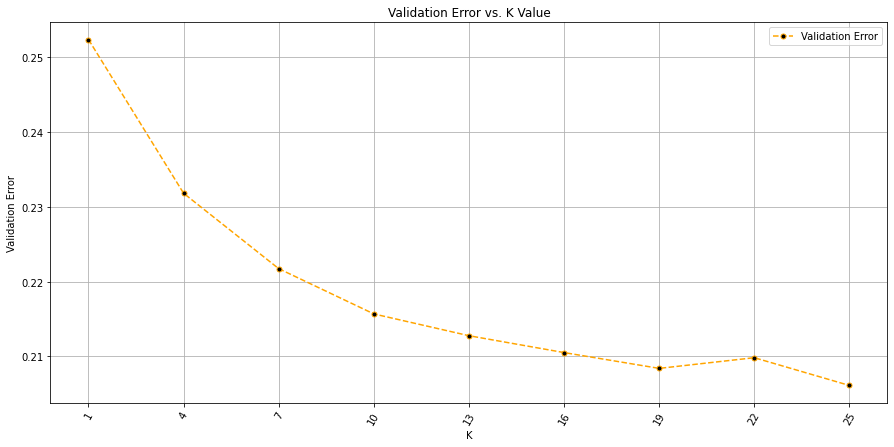

In [60]:
from sklearn.neighbors import KNeighborsClassifier

### Tuning using K-fold Cross Validation
from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,26,3)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_train, y_train,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [63]:
from sklearn.neighbors import KNeighborsClassifier

best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

25

The accuracy score is: 0.7937333333333333
The classification report is: 
               precision    recall  f1-score   support

    negative       0.81      0.77      0.79      7474
    positive       0.78      0.82      0.80      7526

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.79      0.79      0.79     15000



<AxesSubplot:>

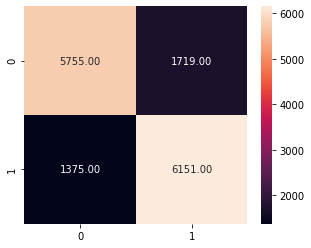

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

matrix=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize = (5,4))
sns.heatmap(matrix, annot=True, fmt = '.2f')

In [73]:
accuracy_knn = 0.793

In [55]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rfc_predictions = rfc.predict(X_test)


print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The accuracy score is: 0.8499333333333333
The confusion matrix is: 
 [[6392 1082]
 [1169 6357]]
The classification report is: 
               precision    recall  f1-score   support

    negative       0.85      0.86      0.85      7474
    positive       0.85      0.84      0.85      7526

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [72]:
accuracy_rf = 0.84993

In [77]:
print("In Percentages\n")
print("Accuracy of Logestic Regression: ",accuracy_lr*100)
print("Accuracy of Random Forest: ",accuracy_rf*100)
print("Accuracy of KNN: ",accuracy_knn*100)
print("Accuracy of Decision Trees: ",accuracy_dt*100)

In Percentages

Accuracy of Logestic Regression:  89.03999999999999
Accuracy of Random Forest:  84.993
Accuracy of KNN:  79.3
Accuracy of Decision Trees:  72.48599999999999


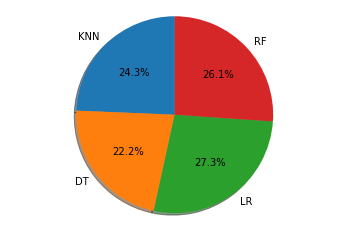

In [80]:
labels =  'KNN','DT','LR','RF'
sizes = [accuracy_knn,accuracy_dt,accuracy_lr,accuracy_rf]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

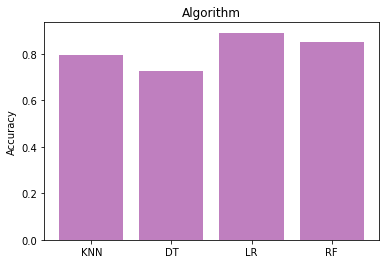

In [81]:
Algo = ('KNN','DT','LR','RF')
y_pos = np.arange(len(Algo))
performance = [accuracy_knn,accuracy_dt,accuracy_lr,accuracy_rf]

plt.bar(y_pos, performance, align='center', alpha=0.5,color='purple')
plt.xticks(y_pos, Algo)
plt.ylabel('Accuracy')
plt.title('Algorithm')

plt.show()